## Forest type mapping

Class: 's' ('Sugi' forest), 'h' ('Hinoki' forest), 'd' ('Mixed deciduous' forest), 'o' ('Other' non-forest land)   
b1 - b9: ASTER image bands containing spectral information in the green, red, and near infrared wavelengths for three dates (Sept. 26, 2010; March 19, 2011; May 08, 2011.   
pred_minus_obs_S_b1 - pred_minus_obs_S_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 's' class (b1-b9).   
pred_minus_obs_H_b1 - pred_minus_obs_H_b9: Predicted spectral values (based on spatial interpolation) minus actual spectral values for the 'h' class (b1-b9).   

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler 

sns.set(style="darkgrid")
raw_data = pd.read_csv('forest_training.csv')
raw_data.head()

class  b1  b2  b3   b4  b5   b6   b7  b8  b9         ...           \
0    d   39  36  57   91  59  101   93  27  60         ...            
1    h   84  30  57  112  51   98   92  26  62         ...            
2    s   53  25  49   99  51   93   84  26  58         ...            
3    s   59  26  49  103  47   92   82  25  56         ...            
4    d   57  49  66  103  64  106  114  28  59         ...            

   pred_minus_obs_H_b9  pred_minus_obs_S_b1  pred_minus_obs_S_b2  \
0                -2.36               -18.41                -1.88   
1                -2.26               -16.27                -1.95   
2                -1.46               -15.92                -1.79   
3                 2.68               -13.77                -2.53   
4                -2.94               -21.74                -1.64   

   pred_minus_obs_S_b3  pred_minus_obs_S_b4  pred_minus_obs_S_b5  \
0                -6.43               -21.03                -1.60   
1                -6.25               -18.79                -1.99   
2                -4.64               -17.73                -0.48   
3                -6.34               -22.03                -2.34   
4                -4.62               -23.74                -0.85   

   pred_minus_obs_S_b6  pred_minus_obs_S_b7  pred_minus_obs_S_b8  \
0                -6.18               -22.50                -5.20   
1                -6.18               -23.41                -8.87   
2                -4.69               -19.97                -4.10   
3                -6.60               -27.10                -7.99   
4                -5.50               -22.83                -2.74   

   pred_minus_obs_S_b9  
0                -7.86  
1               -10.83  
2                -7.07  
3               -10.81  
4                -5.84  

[5 rows x 28 columns]

In [2]:
# information of dataset
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 28 columns):
class                  198 non-null object
b1                     198 non-null int64
b2                     198 non-null int64
b3                     198 non-null int64
b4                     198 non-null int64
b5                     198 non-null int64
b6                     198 non-null int64
b7                     198 non-null int64
b8                     198 non-null int64
b9                     198 non-null int64
pred_minus_obs_H_b1    198 non-null float64
pred_minus_obs_H_b2    198 non-null float64
pred_minus_obs_H_b3    198 non-null float64
pred_minus_obs_H_b4    198 non-null float64
pred_minus_obs_H_b5    198 non-null float64
pred_minus_obs_H_b6    198 non-null float64
pred_minus_obs_H_b7    198 non-null float64
pred_minus_obs_H_b8    198 non-null float64
pred_minus_obs_H_b9    198 non-null float64
pred_minus_obs_S_b1    198 non-null float64
pred_minus_obs_S_b2    198 non-nul

In [3]:
raw_data.describe()

b1          b2          b3          b4          b5          b6  \
count  198.000000  198.000000  198.000000  198.000000  198.000000  198.000000   
mean    62.949495   41.020202   63.676768  101.409091   58.732323  100.651515   
std     12.779563   17.832543   17.314545   14.804627   12.392648   11.190314   
min     34.000000   25.000000   47.000000   54.000000   44.000000   84.000000   
25%     54.000000   28.000000   52.000000   92.250000   49.000000   92.000000   
50%     60.000000   31.500000   57.000000   99.500000   55.000000   98.000000   
75%     70.750000   50.750000   69.000000  111.750000   65.000000  107.000000   
max    105.000000  160.000000  196.000000  172.000000   98.000000  136.000000   

               b7          b8          b9  pred_minus_obs_H_b1  \
count  198.000000  198.000000  198.000000           198.000000   
mean    90.601010   28.691919   61.116162            50.818889   
std     15.588861    8.977752    9.787158            12.842321   
min     54.000000   21.000000   50.000000             7.660000   
25%     80.000000   24.000000   55.000000            40.667500   
50%     91.000000   25.000000   58.000000            53.030000   
75%    101.000000   27.000000   63.000000            59.920000   
max    139.000000   82.000000  109.000000            83.320000   

              ...           pred_minus_obs_H_b9  pred_minus_obs_S_b1  \
count         ...                    198.000000           198.000000   
mean          ...                     -5.594141           -20.037576   
std           ...                      9.769193             4.948562   
min           ...                    -53.530000           -32.950000   
25%           ...                     -6.627500           -23.325000   
50%           ...                     -2.255000           -20.020000   
75%           ...                      0.247500           -17.787500   
max           ...                      5.740000             5.130000   

       pred_minus_obs_S_b2  pred_minus_obs_S_b3  pred_minus_obs_S_b4  \
count           198.000000           198.000000           198.000000   
mean             -1.007121            -4.355657           -20.996919   
std               1.783671             2.352311             6.490763   
min              -8.800000           -11.210000           -40.370000   
25%              -1.860000            -5.790000           -24.090000   
50%              -0.970000            -4.350000           -20.465000   
75%              -0.042500            -2.882500           -17.955000   
max              12.460000             7.370000             1.880000   

       pred_minus_obs_S_b5  pred_minus_obs_S_b6  pred_minus_obs_S_b7  \
count           198.000000           198.000000           198.000000   
mean             -0.973737            -4.597626           -18.840000   
std               0.702619             1.736712             5.251095   
min              -3.270000            -8.730000           -34.140000   
25%              -1.290000            -5.747500           -22.237500   
50%              -0.945000            -4.540000           -19.200000   
75%              -0.642500            -3.617500           -16.227500   
max               3.440000             3.940000             3.670000   

       pred_minus_obs_S_b8  pred_minus_obs_S_b9  
count           198.000000           198.000000  
mean             -1.570808            -4.155859  
std               1.807792             1.982423  
min              -8.870000           -10.830000  
25%              -2.370000            -5.122500  
50%              -1.420000            -4.125000  
75%              -0.655000            -3.105000  
max               8.840000             7.790000  

[8 rows x 27 columns]

In [4]:
data_feature = raw_data.iloc[:,1:28]
data_target = raw_data.iloc[:,0]

In [5]:
# s, h, d, o class features
s_class = raw_data[raw_data['class']=='s ']
s_class.head()

h_class = raw_data[raw_data['class']=='h ']
h_class.head()

d_class = raw_data[raw_data['class']=='d ']
d_class.head()

o_class = raw_data[raw_data['class']=='o ']
o_class.head()

# raw_data[raw_data['class']=='s '] = 0
# raw_data[raw_data['class']=='h '] = 1
# raw_data[raw_data['class']=='d '] = 2
# raw_data[raw_data['class']=='o '] = 3

class  b1  b2  b3   b4  b5   b6   b7  b8  b9         ...           \
9     o   51  57  77   90  89  123   97  47  83         ...            
11    o   75  68  89  116  77  118   94  42  76         ...            
12    o   64  52  71   98  72  109   87  37  70         ...            
15    o   41  44  67   64  71  104   84  54  85         ...            
16    o   67  68  89  108  74  114  117  44  86         ...            

    pred_minus_obs_H_b9  pred_minus_obs_S_b1  pred_minus_obs_S_b2  \
9                -26.44               -20.97                -1.76   
11               -20.64               -24.49                -1.42   
12               -12.59               -18.32                -2.47   
15               -28.44               -18.06                -3.04   
16               -29.84               -20.10                -0.05   

    pred_minus_obs_S_b3  pred_minus_obs_S_b4  pred_minus_obs_S_b5  \
9                 -5.05               -22.01                -0.93   
11                -4.34               -27.33                -0.91   
12                -7.93               -20.07                -1.51   
15               -10.02               -18.23                -1.68   
16                -3.10               -20.06                -1.11   

    pred_minus_obs_S_b6  pred_minus_obs_S_b7  pred_minus_obs_S_b8  \
9                 -5.60               -22.26                -3.28   
11                -5.92               -24.10                -1.21   
12                -6.34               -21.78                -4.52   
15                -7.48               -19.16                -2.55   
16                -4.97               -18.07                -0.29   

    pred_minus_obs_S_b9  
9                 -6.39  
11                -4.88  
12                -7.42  
15                -6.17  
16                -3.91  

[5 rows x 28 columns]

Text(0.5, 1.0, 'The number of different class forest in the DataSet:')

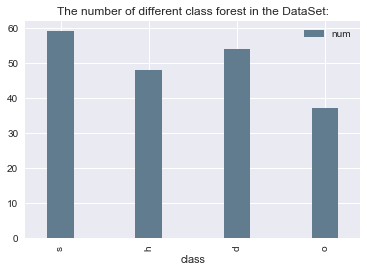

In [6]:

target_size = pd.DataFrame({'num':[s_class.shape[0],h_class.shape[0],d_class.shape[0],o_class.shape[0]]}, 
                           index = ['s','h','d','o'])

target_size.plot.bar(grid=True,width=0.3,color='#607c8e')
plt.xlabel('class')
plt.title('The number of different class forest in the DataSet:')

Text(0.5, 0, 'o class')

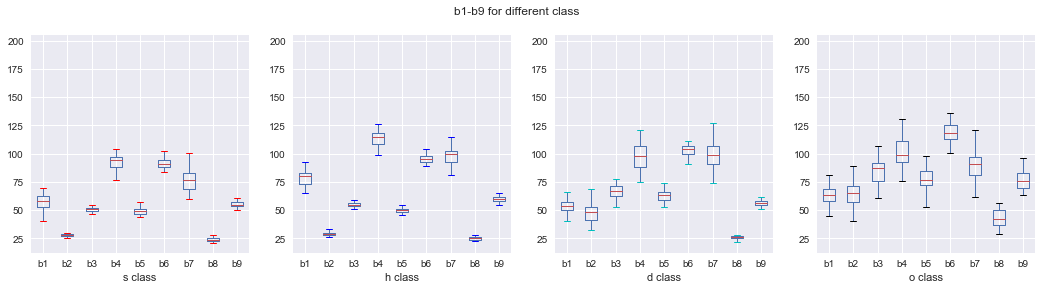

In [7]:

plt.figure(figsize=(18,4))
plt.suptitle('b1-b9 for different class')
plt.subplot(141)
s_b=s_class.iloc[:,1:10]
s_b.head()
axs = s_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'red'},
                 capprops = {'color': 'red'},
                 flierprops={'color':'red','markeredgecolor':'red'})
plt.xlabel('s class')

plt.subplot(142, sharey=axs)
h_b=h_class.iloc[:,1:10]
h_b.head()
axh = h_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'b'},
                 capprops = {'color': 'b'},
                 flierprops={'color':'b','markeredgecolor':'b'})
plt.xlabel('h class')

plt.subplot(143, sharey=axs)
d_b=d_class.iloc[:,1:10]
d_b.head()
axd = d_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'c'},
                 capprops = {'color': 'c'},
                 flierprops={'color':'c','markeredgecolor':'c'})
plt.xlabel('d class')

plt.subplot(144, sharey=axs)
o_b=o_class.iloc[:,1:10]
o_b.head()
ax0 = o_b.boxplot(grid=True)
plt.xlabel('o class')


Text(0.5, 0, 'o class')

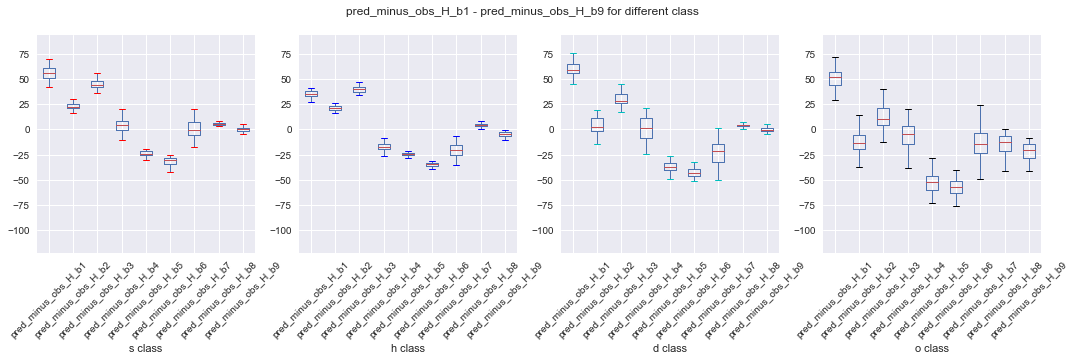

In [8]:

plt.figure(figsize=(18,4))
plt.suptitle('pred_minus_obs_H_b1 - pred_minus_obs_H_b9 for different class')
plt.subplot(141)
s_b=s_class.iloc[:,10:19]
s_b.head()
axs = s_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'red'},
                 capprops = {'color': 'red'},
                 flierprops={'color':'red','markeredgecolor':'red'},
                 rot=45)
plt.xlabel('s class')

plt.subplot(142, sharey=axs)
h_b=h_class.iloc[:,10:19]
h_b.head()
axh = h_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'b'},
                 capprops = {'color': 'b'},
                 flierprops={'color':'b','markeredgecolor':'b'},
                 rot=45)
plt.xlabel('h class')

plt.subplot(143, sharey=axs)
d_b=d_class.iloc[:,10:19]
d_b.head()
axd = d_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'c'},
                 capprops = {'color': 'c'},
                 flierprops={'color':'c','markeredgecolor':'c'},
                 rot=45)
plt.xlabel('d class')

plt.subplot(144, sharey=axs)
o_b=o_class.iloc[:,10:19]
o_b.head()
ax0 = o_b.boxplot(grid=True, rot=45)
plt.xlabel('o class')


Text(0.5, 0, 'o class')

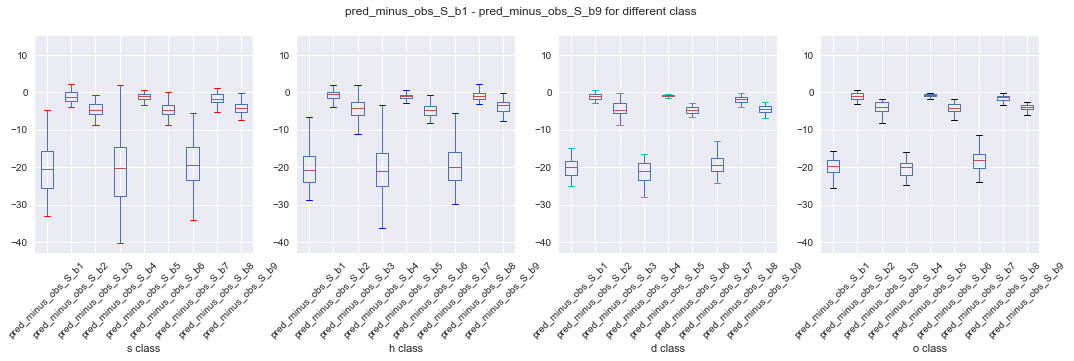

In [9]:

plt.figure(figsize=(18,4))
plt.suptitle('pred_minus_obs_S_b1 - pred_minus_obs_S_b9 for different class')
plt.subplot(141)
s_b=s_class.iloc[:,19:28]
s_b.head()
axs = s_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'red'},
                 capprops = {'color': 'red'},
                 flierprops={'color':'red','markeredgecolor':'red'},
                 rot=45)
plt.xlabel('s class')

plt.subplot(142, sharey=axs)
h_b=h_class.iloc[:,19:28]
h_b.head()
axh = h_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'b'},
                 capprops = {'color': 'b'},
                 flierprops={'color':'b','markeredgecolor':'b'},
                 rot=45)
plt.xlabel('h class')

plt.subplot(143, sharey=axs)
d_b=d_class.iloc[:,19:28]
d_b.head()
axd = d_b.boxplot(grid=True, 
                 whiskerprops = {'color': 'c'},
                 capprops = {'color': 'c'},
                 flierprops={'color':'c','markeredgecolor':'c'},
                 rot=45)
plt.xlabel('d class')

plt.subplot(144, sharey=axs)
o_b=o_class.iloc[:,19:28]
o_b.head()
ax0 = o_b.boxplot(grid=True, rot=45)
plt.xlabel('o class')

In [10]:
raw_data.head(5)
c = raw_data.iloc[:,0]
c = c.to_frame()
c.head()

fb = raw_data.iloc[:,0:10]
fb.head(5)

hb = raw_data.drop(raw_data.columns[[1,2,3,4,5,6,7,8,9,19,20,21,22,23,24,25,26,27]], axis=1)
hb.head(5)

hs = raw_data.drop(raw_data.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]], axis=1)
hs.head(5)

class  pred_minus_obs_S_b1  pred_minus_obs_S_b2  pred_minus_obs_S_b3  \
0    d                -18.41                -1.88                -6.43   
1    h                -16.27                -1.95                -6.25   
2    s                -15.92                -1.79                -4.64   
3    s                -13.77                -2.53                -6.34   
4    d                -21.74                -1.64                -4.62   

   pred_minus_obs_S_b4  pred_minus_obs_S_b5  pred_minus_obs_S_b6  \
0               -21.03                -1.60                -6.18   
1               -18.79                -1.99                -6.18   
2               -17.73                -0.48                -4.69   
3               -22.03                -2.34                -6.60   
4               -23.74                -0.85                -5.50   

   pred_minus_obs_S_b7  pred_minus_obs_S_b8  pred_minus_obs_S_b9  
0               -22.50                -5.20                -7.86  
1               -23.41                -8.87               -10.83  
2               -19.97                -4.10                -7.07  
3               -27.10                -7.99               -10.81  
4               -22.83                -2.74                -5.84

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


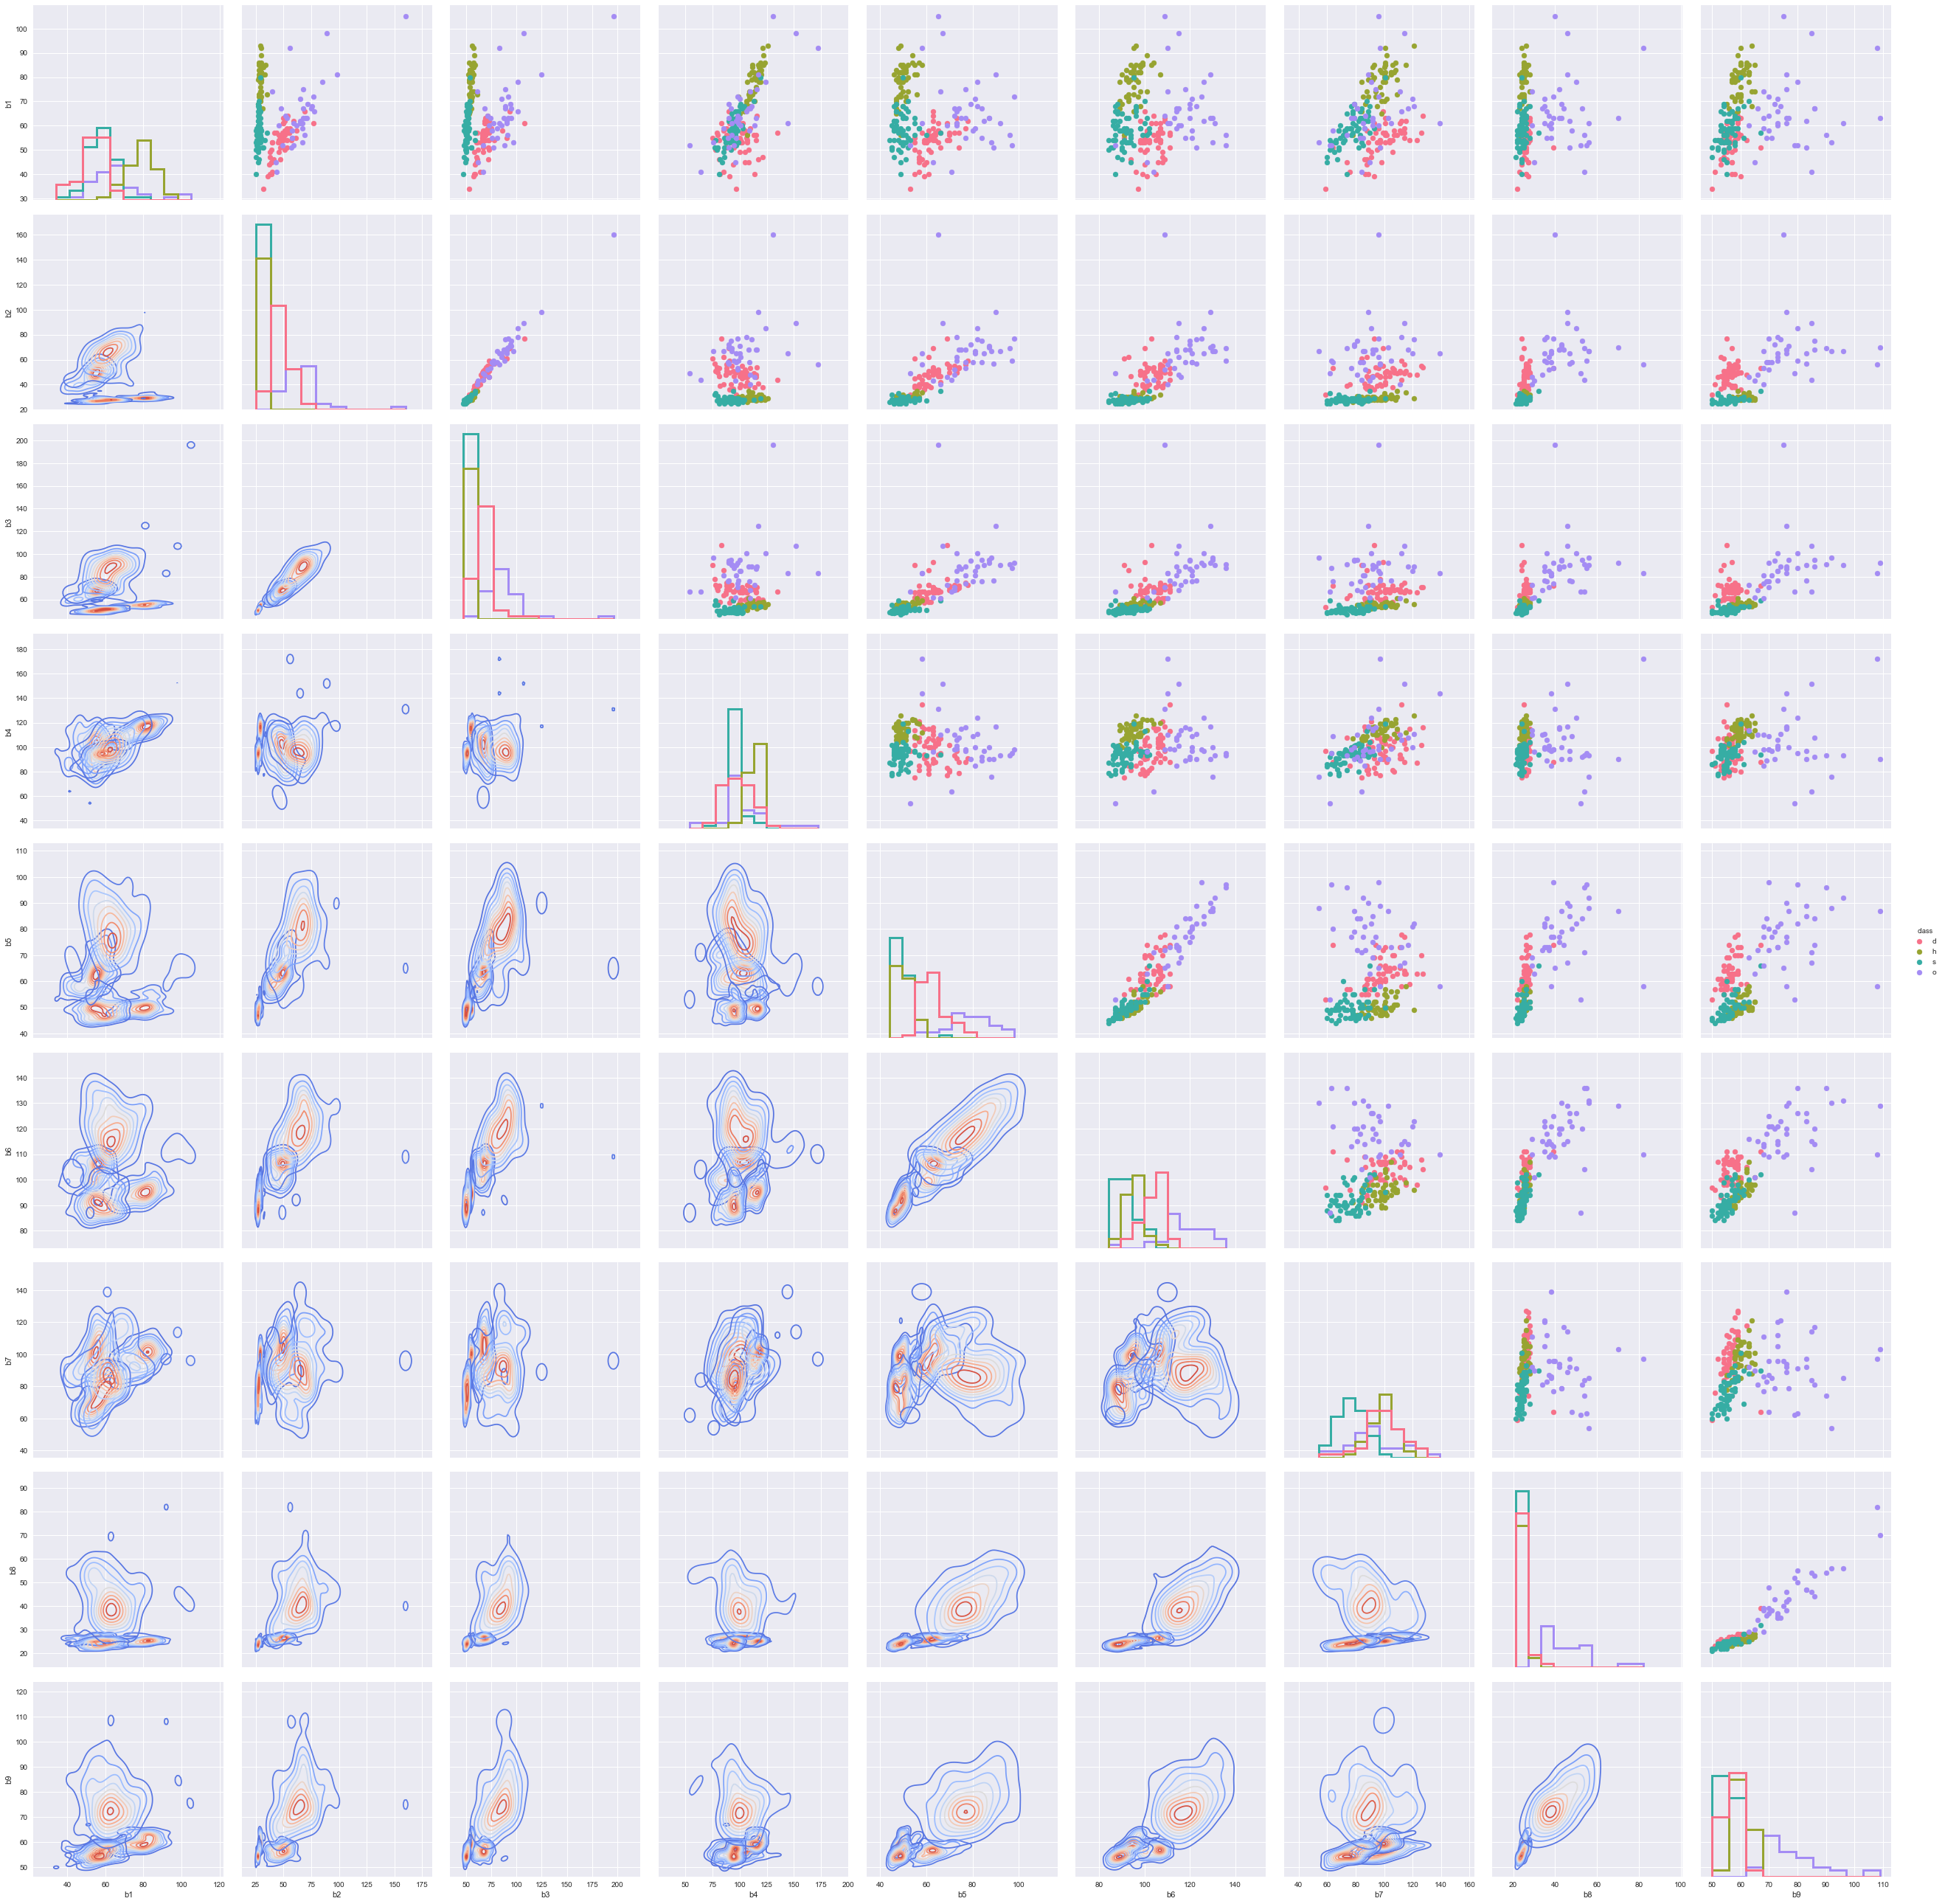

In [11]:

x = sns.PairGrid(fb, hue='class', palette='husl',  size = 4)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot,cmap='coolwarm')
x = x.map_diag(plt.hist,histtype='step', linewidth=3)
x = x.add_legend() # add legend

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


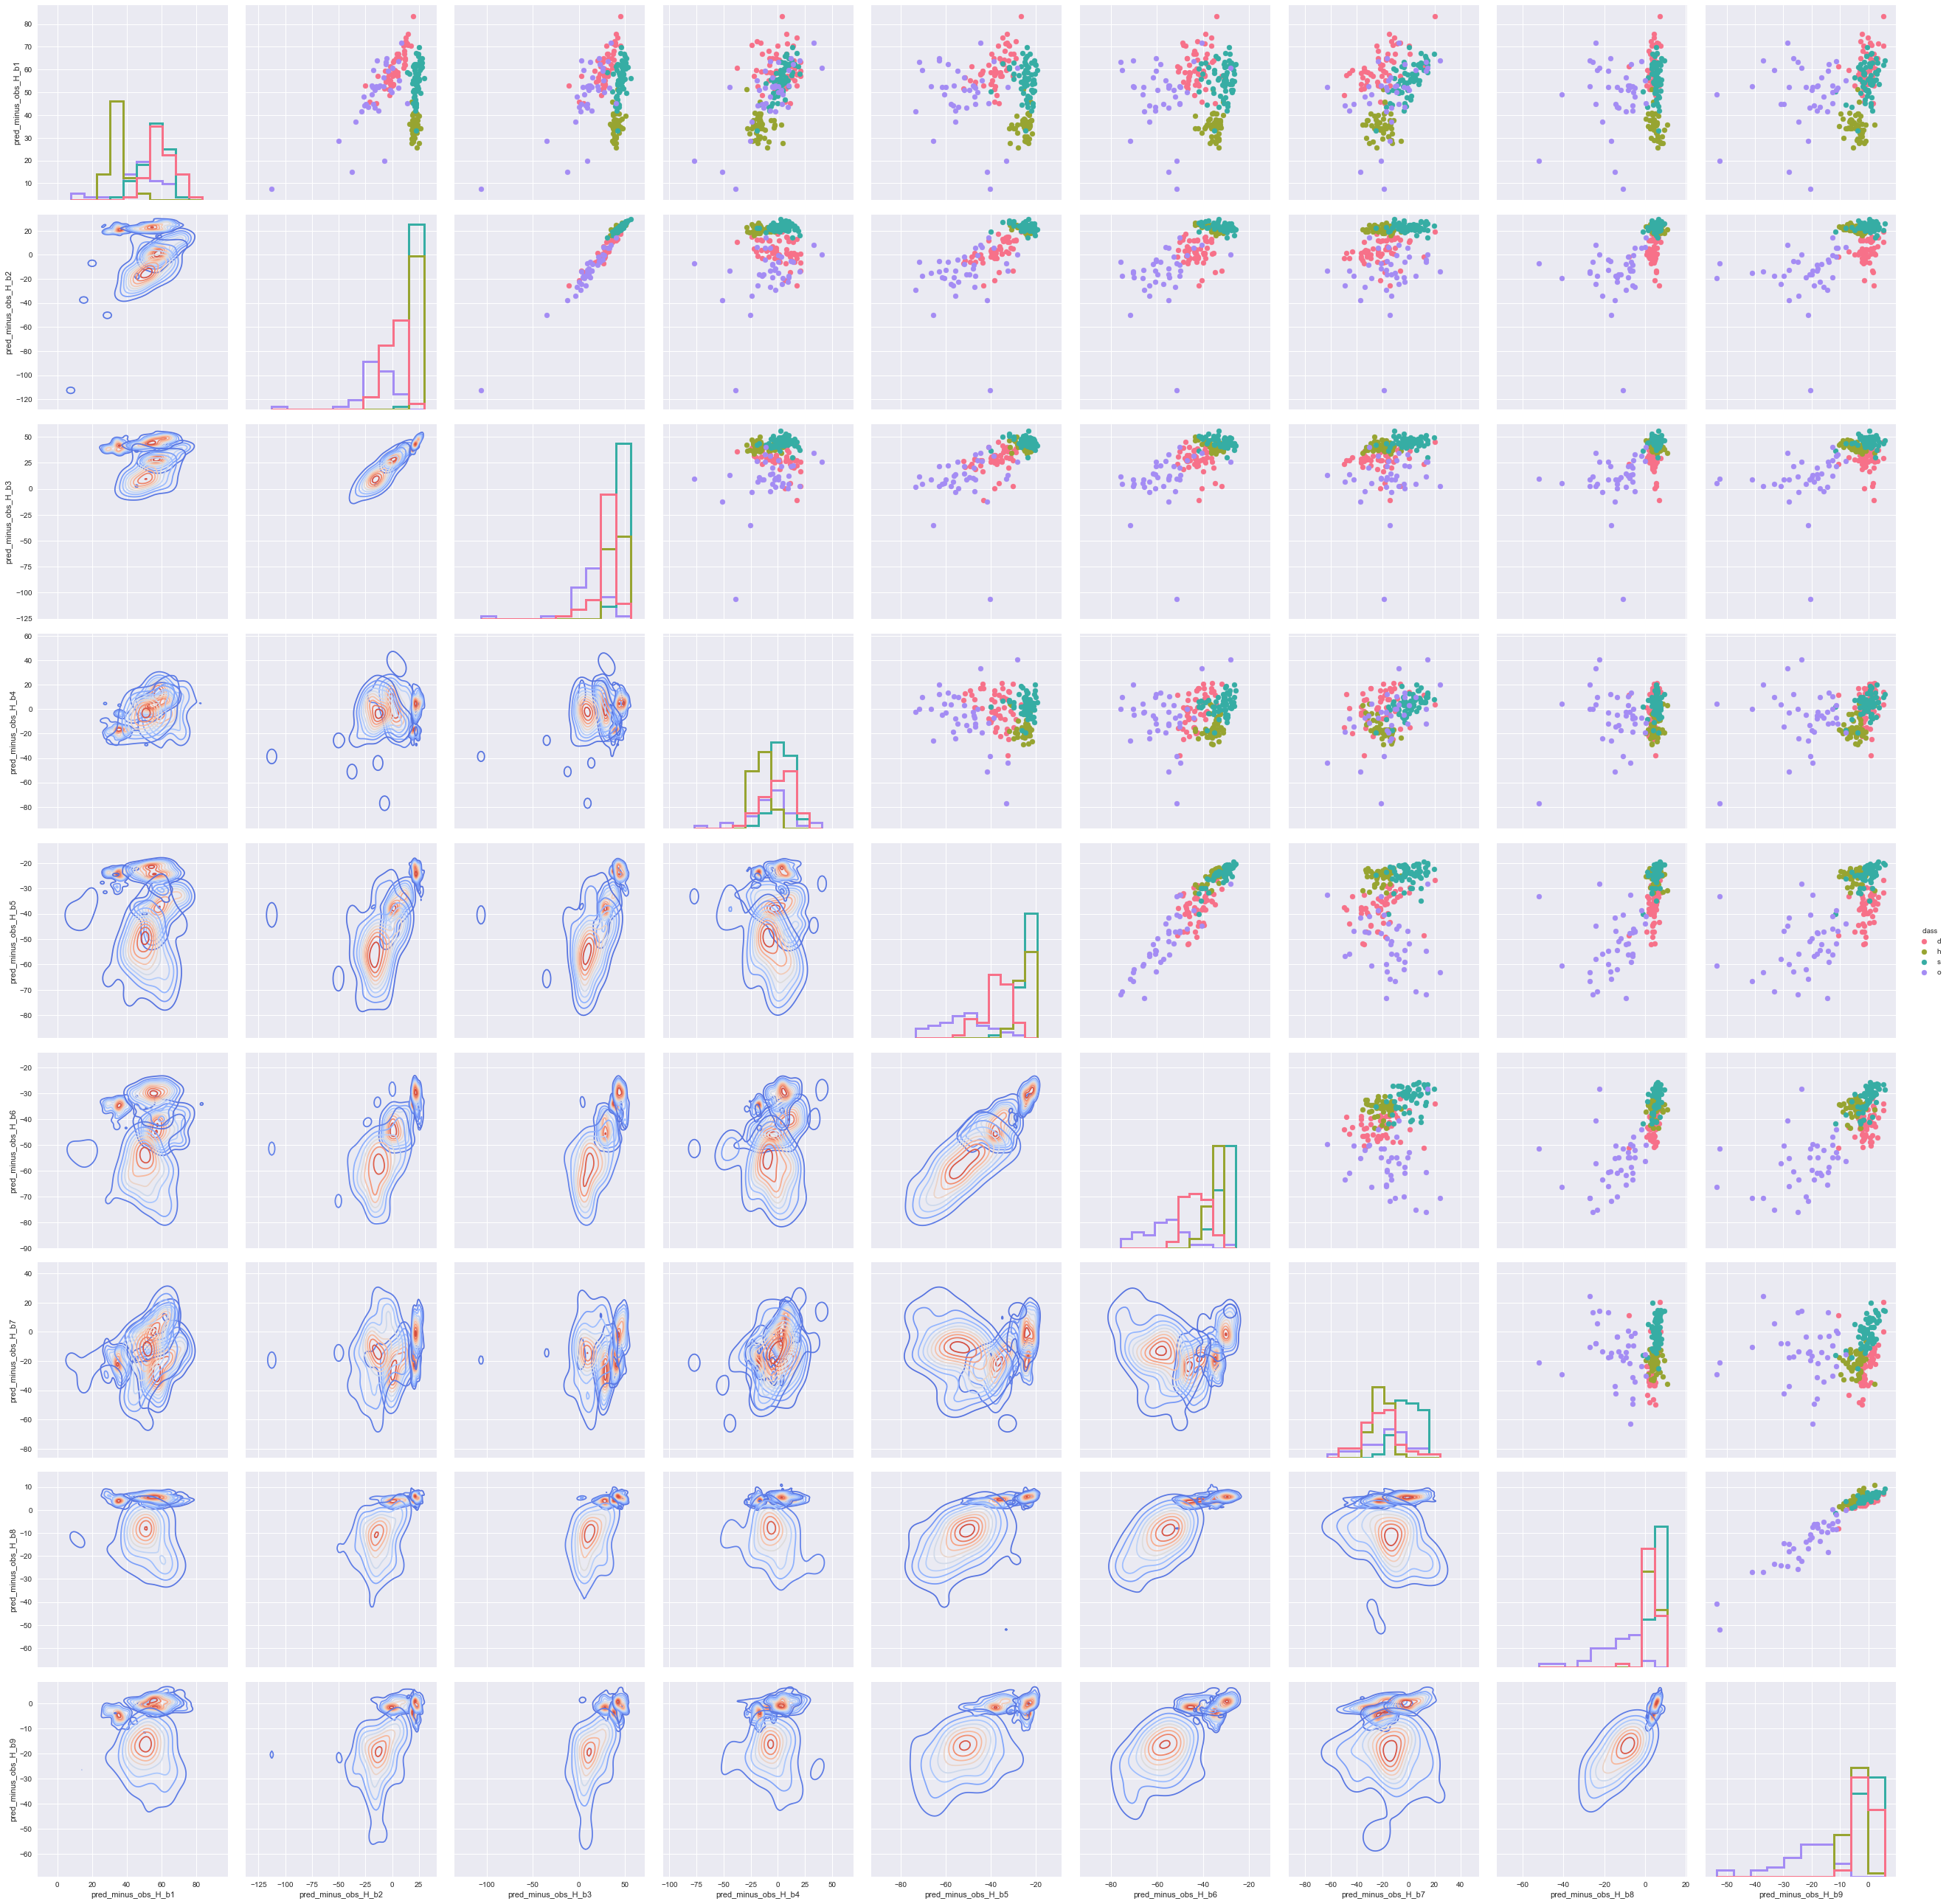

In [12]:

x = sns.PairGrid(hb, hue='class', palette='husl',  size = 4)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot,cmap='coolwarm')
x = x.map_diag(plt.hist,histtype='step', linewidth=3)
x = x.add_legend() # add legend

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Anaconda\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


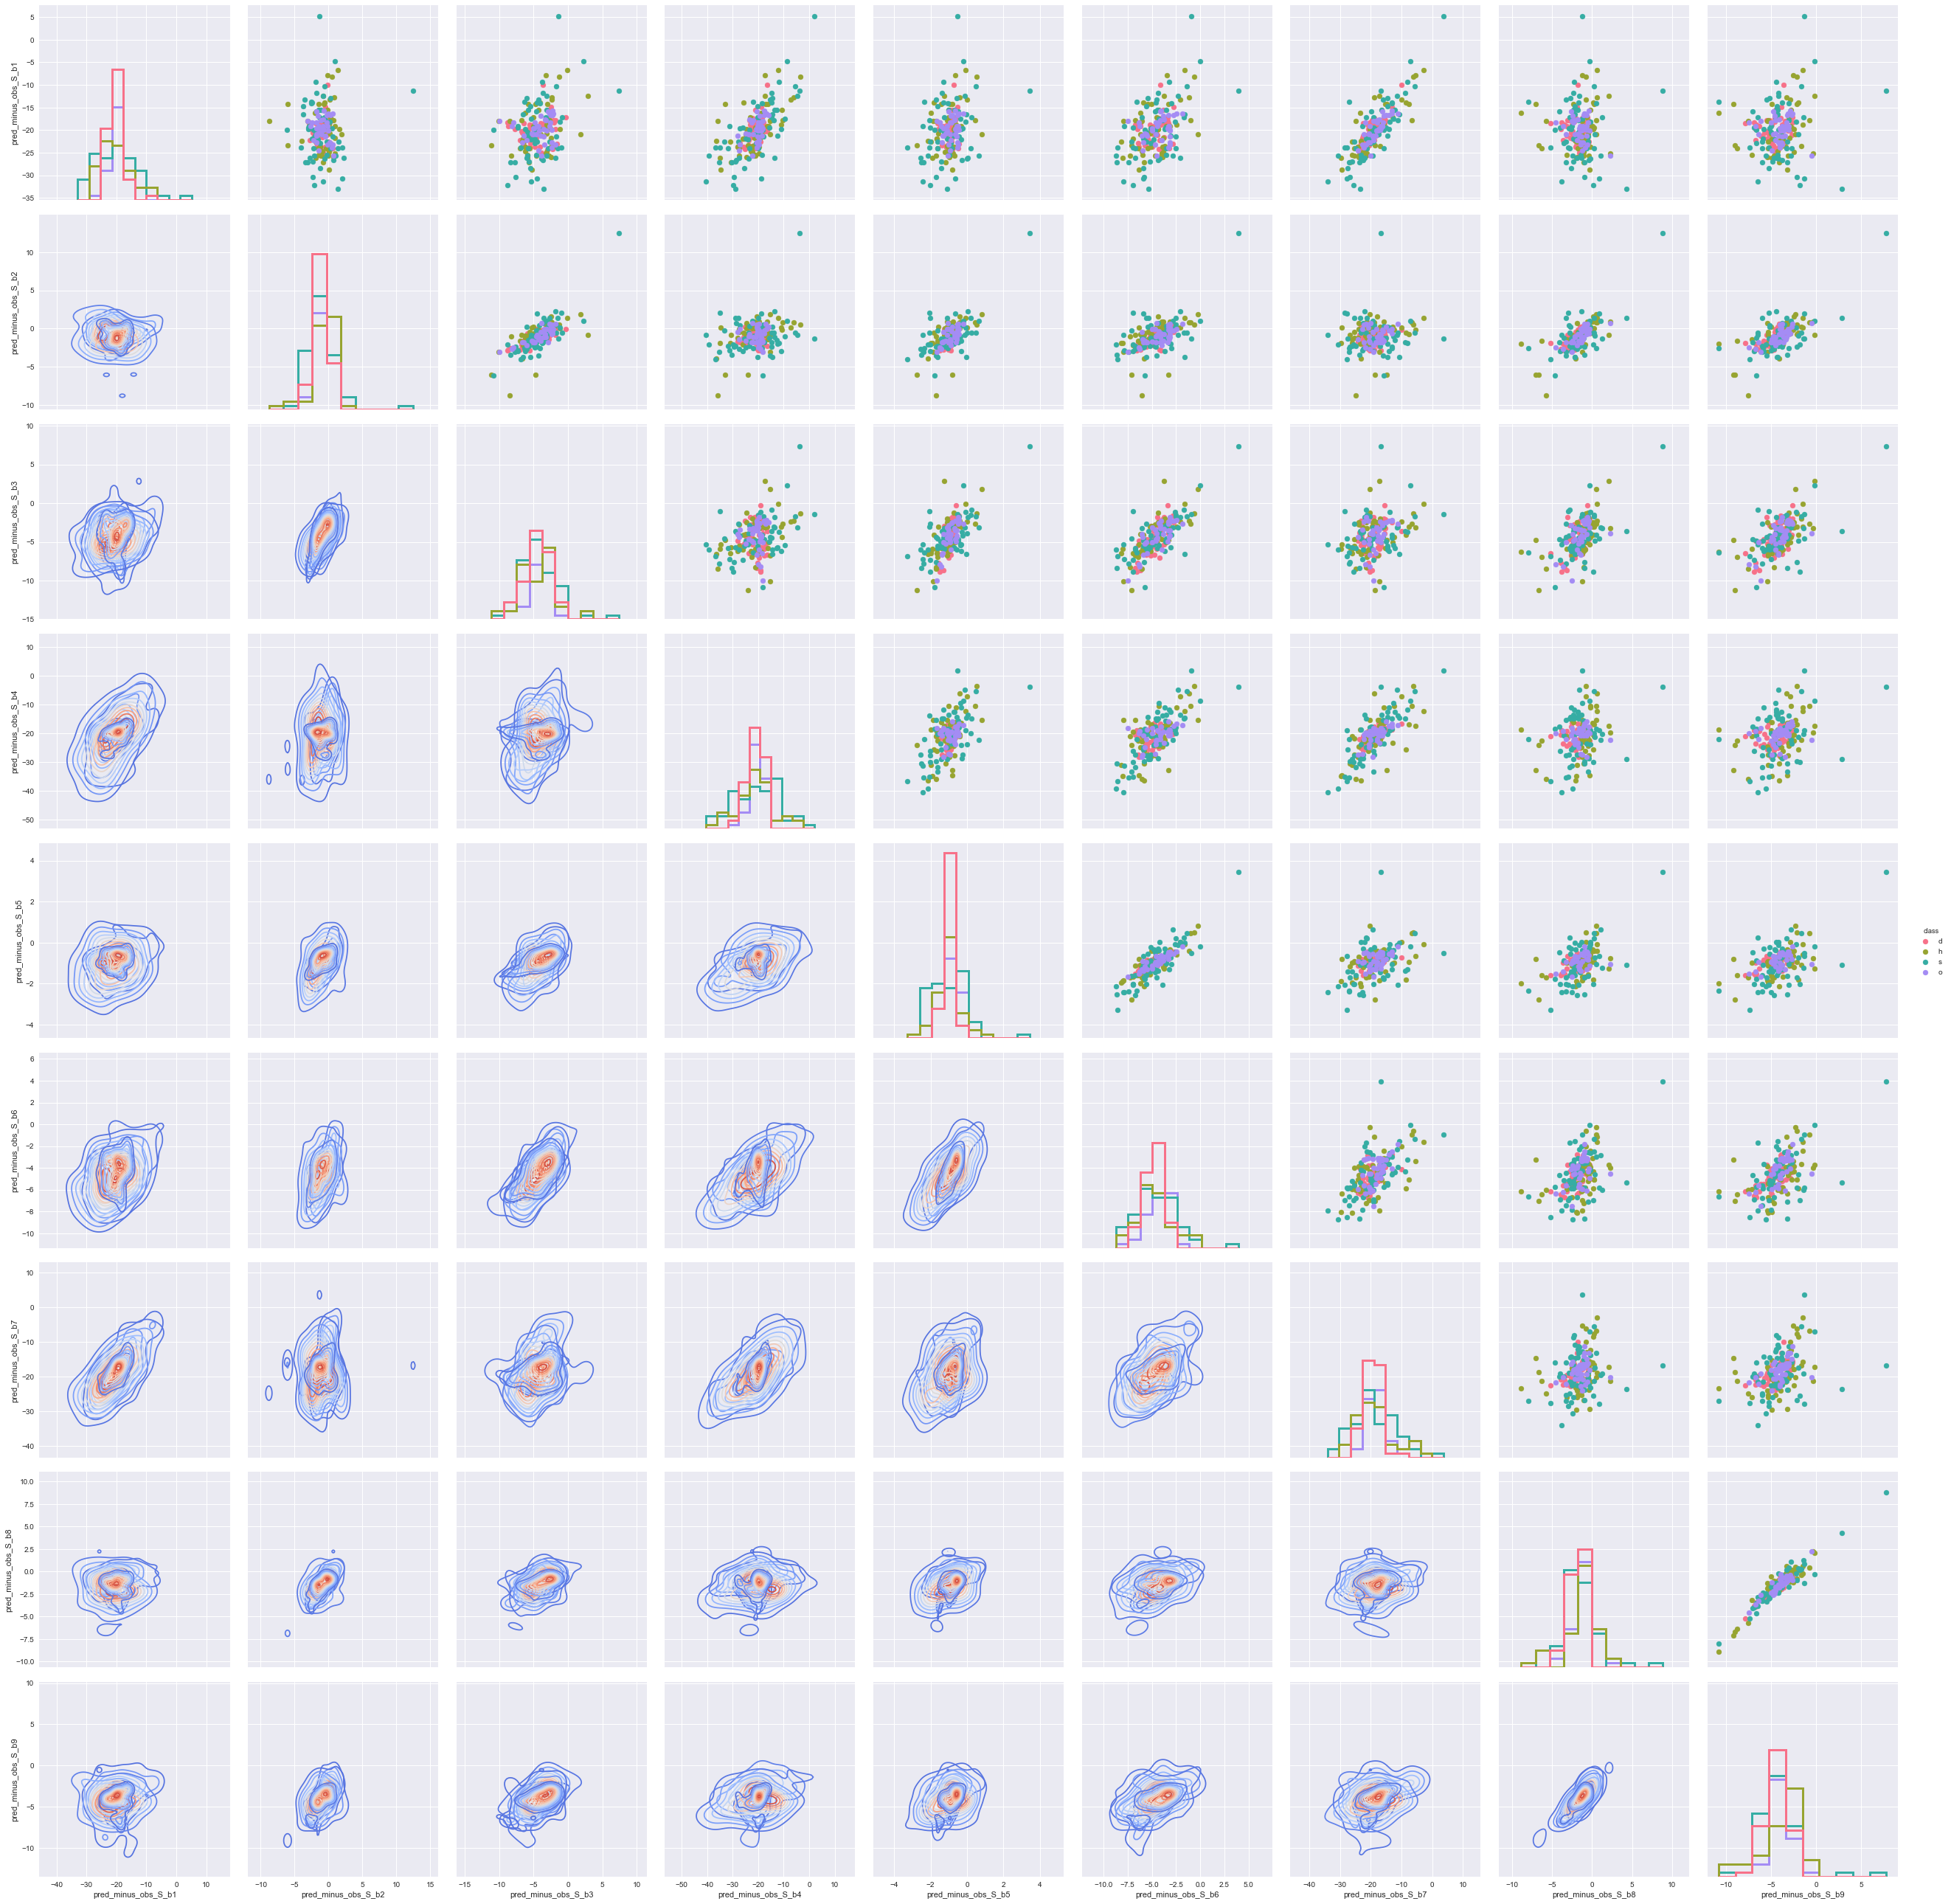

In [13]:
x = sns.PairGrid(hs, hue='class', palette='husl',  size = 4)
x = x.map_upper(plt.scatter)
x = x.map_lower(sns.kdeplot,cmap='coolwarm')
x = x.map_diag(plt.hist,histtype='step', linewidth=3)
x = x.add_legend() # add legend

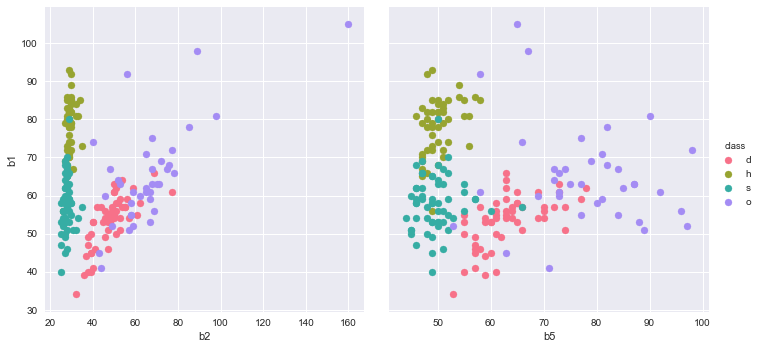

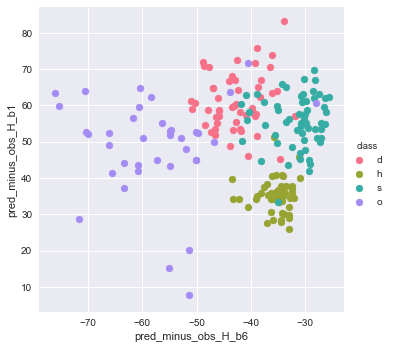

In [14]:

x = sns.PairGrid(fb, hue='class', palette='husl', x_vars=['b2','b5'],
                 y_vars=['b1'], size=5)
x = x.map(plt.scatter)
x = x.add_legend() # add legend

y = sns.PairGrid(hb, hue='class', palette='husl', x_vars=['pred_minus_obs_H_b6'],
                 y_vars=['pred_minus_obs_H_b1'], size=5)
y = y.map(plt.scatter)
y = y.add_legend() # add legend

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


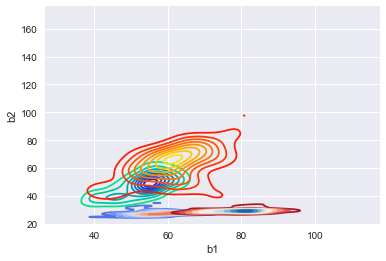

In [15]:

sns.kdeplot(s_class.b1, s_class.b2, cmap='coolwarm')
sns.kdeplot(h_class.b1, h_class.b2, cmap='RdBu')
sns.kdeplot(d_class.b1, d_class.b2, cmap='winter_r')
sns.kdeplot(o_class.b1, o_class.b2, cmap='autumn')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


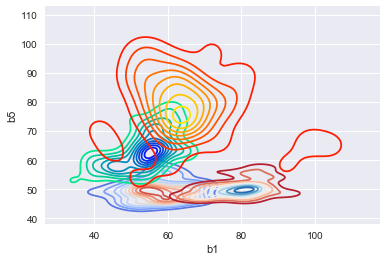

In [16]:

sns.kdeplot(s_class.b1, s_class.b5, cmap='coolwarm')
sns.kdeplot(h_class.b1, h_class.b5, cmap='RdBu')
sns.kdeplot(d_class.b1, d_class.b5, cmap='winter_r')
sns.kdeplot(o_class.b1, o_class.b5, cmap='autumn')

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


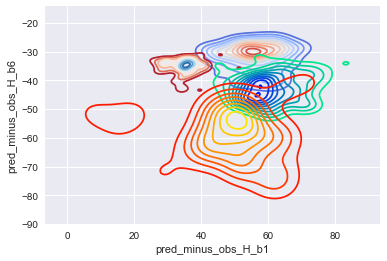

In [17]:

sns.kdeplot(s_class.pred_minus_obs_H_b1, s_class.pred_minus_obs_H_b6, cmap='coolwarm')
sns.kdeplot(h_class.pred_minus_obs_H_b1, h_class.pred_minus_obs_H_b6, cmap='RdBu')
sns.kdeplot(d_class.pred_minus_obs_H_b1, d_class.pred_minus_obs_H_b6, cmap='winter_r')
sns.kdeplot(o_class.pred_minus_obs_H_b1, o_class.pred_minus_obs_H_b6, cmap='autumn')

In [18]:
# data normalize
fm = raw_data.iloc[:,1:]
cl = raw_data.iloc[:,0]
fm.head()
scaler=StandardScaler().fit(fm) #define scaler depending on the features in training data
fms=scaler.transform(fm) #apply scaling on training set

f = pd.DataFrame(fms, columns=fm.columns)
# f = pd.concat([cl, f], axis=1)
f.shape

(198, 27)

PCA

In [19]:

N_components=2 # Define the number of principle components

# PCA
data_pca = PCA(n_components=N_components).fit(f)
f_pca = data_pca.transform(f)

f_pcaframe = pd.DataFrame(f_pca, columns=['PC1','PC2'])
# f_pcaframe.shape
fin_pca = pd.concat([cl, f_pcaframe], axis=1)


# t-SNE
f_tsne = TSNE(n_components = N_components,random_state=42).fit_transform(f)
f_tsneframe = pd.DataFrame(f_tsne, columns=['tSNE1','tSNE2'])
# f_tsneframe.head()
fin_tsne = pd.concat([cl, f_tsneframe], axis=1)


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


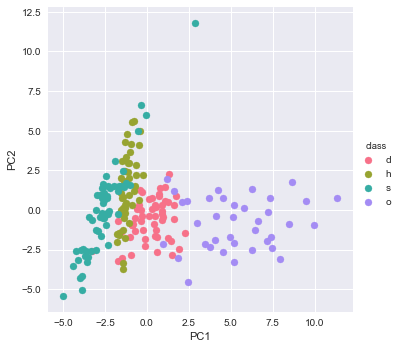

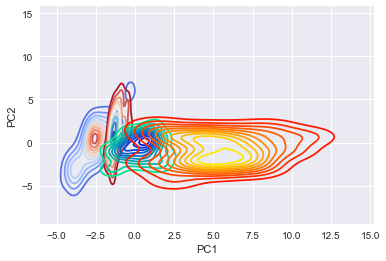

In [20]:
# PCA plot
x = sns.PairGrid(fin_pca, hue='class', palette='husl', x_vars=['PC1'],
                 y_vars=['PC2'], size=5)
x = x.map(plt.scatter)
x = x.add_legend() # add legend

plt.figure()
sns.kdeplot(fin_pca.PC1[fin_pca['class']=='s '], fin_pca.PC2[fin_pca['class']=='s '], cmap='coolwarm')
sns.kdeplot(fin_pca.PC1[fin_pca['class']=='h '], fin_pca.PC2[fin_pca['class']=='h '], cmap='RdBu')
sns.kdeplot(fin_pca.PC1[fin_pca['class']=='d '], fin_pca.PC2[fin_pca['class']=='d '], cmap='winter_r')
sns.kdeplot(fin_pca.PC1[fin_pca['class']=='o '], fin_pca.PC2[fin_pca['class']=='o '], cmap='autumn')

t_SNE

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


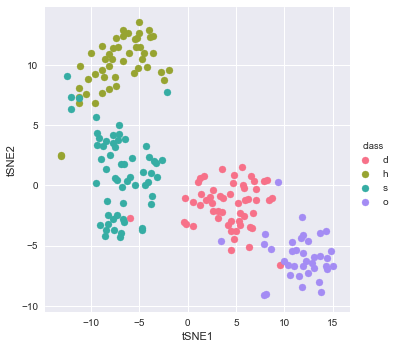

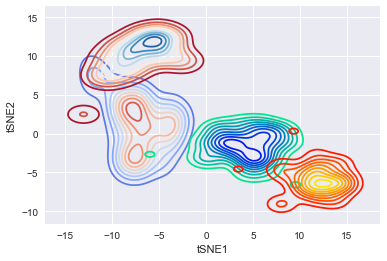

In [21]:
# t-SNE
x = sns.PairGrid(fin_tsne, hue='class', palette='husl', x_vars=['tSNE1'],
                 y_vars=['tSNE2'], size=5)
x = x.map(plt.scatter)
x = x.add_legend() # add legend

plt.figure()
sns.kdeplot(fin_tsne.tSNE1[fin_tsne['class']=='s '], fin_tsne.tSNE2[fin_tsne['class']=='s '], cmap='coolwarm')
sns.kdeplot(fin_tsne.tSNE1[fin_tsne['class']=='h '], fin_tsne.tSNE2[fin_tsne['class']=='h '], cmap='RdBu')
sns.kdeplot(fin_tsne.tSNE1[fin_tsne['class']=='d '], fin_tsne.tSNE2[fin_tsne['class']=='d '], cmap='winter_r')
sns.kdeplot(fin_tsne.tSNE1[fin_tsne['class']=='o '], fin_tsne.tSNE2[fin_tsne['class']=='o '], cmap='autumn')